In [2]:
# Import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sqlalchemy import create_engine
#from config import db_password
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
# CSV import preprocessed (reduced, encoded, etc) data
## REPLACE WITH DATA STORAGE IMPORT IN NEXT VERSION ##
health_df = pd.read_csv('../Resources/diabetes_binary_health_indicators_BRFSS2015.csv')

health_df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


array([[<AxesSubplot:title={'center':'MentHlth'}>]], dtype=object)

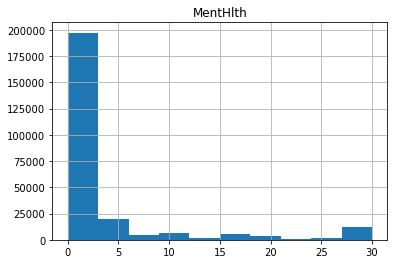

In [4]:
# Look at histogram of target (MentHlth) to decide bin ranges
health_df.hist(column='MentHlth')

In [9]:
# Create 3 bins for mental health. One at 0, one from 1-15 and one from 16-30
for index, row in health_df.iterrows():
    if health_df.loc[index,'MentHlth'] == 0:
        health_df.loc[index, 'MentHlth'] = 0
    elif health_df.loc[index,'MentHlth'] < 16:
        health_df.loc[index, 'MentHlth'] = 1
    elif health_df.loc[index,'MentHlth'] < 31:
        health_df.loc[index, 'MentHlth'] = 2
    else:
        health_df.loc[index, 'MentHlth'] = np.NaN

array([[<AxesSubplot:title={'center':'MentHlth'}>]], dtype=object)

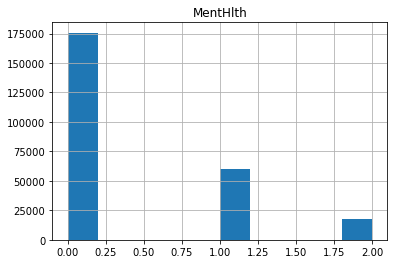

In [13]:
# Check target column bins
health_df.hist(column='MentHlth')

In [14]:
# Remove mental health target from features data
y = health_df.MentHlth
X = health_df.drop(columns=["MentHlth"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=0)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)

In [20]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, y_pred)

# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Accuracy Score : 0.6835698517817723
Classification Report
              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81     43920
         1.0       0.39      0.21      0.27     15034
         2.0       0.42      0.17      0.24      4466

    accuracy                           0.68     63420
   macro avg       0.51      0.43      0.44     63420
weighted avg       0.63      0.68      0.64     63420

